# Lab 2: ML Life Cycle: Data Understanding and Data Preparation

In [3]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In this lab, you will practice the second and third steps of the machine learning life cycle: data understanding and data preparation. You will beging preparing your data so that it can be used to train a machine learning model that solves a regression problem. Note that by the end of the lab, your data set won't be completely ready for the modeling phase, but you will gain experience using some common data preparation techniques. 

You will complete the following tasks to transform your data:

1. Build your data matrix and define your ML problem:
    * Load the Airbnb "listings" data set into a DataFrame and inspect the data
    * Define the label and convert the label's data type to one that is more suitable for modeling
    * Identify features
2. Clean your data:
    * Handle outliers by building a new regression label column by winsorizing outliers
    * Handle missing data by replacing all missing values in the dataset with means
3. Perform feature transformation using one-hot encoding
4. Explore your data:
    * Identify two features with the highest correlation with label
    * Build appropriate bivariate plots to visualize the correlations between features and the label
5. Analysis:
    * Analyze the relationship between the features and the label
    * Brainstorm what else needs to be done to fully prepare the data for modeling

## Part 1. Build Your Data Matrix (DataFrame) and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will be working with the Airbnb NYC "listings" data set. Use the specified path and name of the file to load the data. Save it as a Pandas DataFrame called `df`.

In [4]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "airbnbData.csv")

**Task**: Load the data and save it to DataFrame `df`.

<i>Note:</i> You may receive a warning message. Ignore this warning.

In [5]:
df = pd.read_csv(filename, header = 0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


####  Inspect the Data


<b>Task</b>: Display the shape of `df` -- that is, the number of rows and columns.

In [6]:
df.shape

(38277, 74)

<b>Task</b>: Display the column names.

In [7]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

**Task**: Get a peek at the data by displaying the first few rows, as you usually do.

In [8]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,https://www.airbnb.com/rooms/5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68


#### Define the Label

Assume that your goal is to train a machine learning model that predicts the price of an Airbnb. This is an example of supervised learning and is a regression problem. In our dataset, our label will be the `price` column. Let's inspect the values in the `price` column.

In [9]:
df['price']

0        $150.00
1         $75.00
2         $60.00
3        $275.00
4         $68.00
          ...   
38272     $79.00
38273     $76.00
38274    $116.00
38275    $106.00
38276    $689.00
Name: price, Length: 38277, dtype: object

Notice the `price` column contains values that are listed as $<$currency_name$>$$<$numeric_value$>$. 
<br>For example, it contains values that look like this: `$120`. <br>

**Task**:  Obtain the data type of the values in this column:

In [10]:
print(df['price'].dtype)

object


Notice that the data type is "object," which in Pandas translates to the String data type.

**Task**:  Display the first 15 unique values of  the `price` column:

In [11]:
print(df['price'].unique()[:15])

['$150.00' '$75.00' '$60.00' '$275.00' '$68.00' '$98.00' '$89.00' '$65.00'
 '$62.00' '$90.00' '$199.00' '$96.00' '$299.00' '$140.00' '$175.00']


In order for us to use the prices for modeling, we will have to transform the values in the `price` column from strings to floats. We will:

* remove the dollar signs (in this case, the platform forces the currency to be the USD, so we do not need to worry about targeting, say, the Japanese Yen sign, nor about converting the values into USD). 
* remove the commas from all values that are in the thousands or above: for example, `$2,500`. 

The code cell below accomplishes this.

In [12]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype(float)

**Task**:  Display the first 15 unique values of  the `price` column again to make sure they have been transformed.

In [13]:
df['price'].unique()[:15]

array([150.,  75.,  60., 275.,  68.,  98.,  89.,  65.,  62.,  90., 199.,
        96., 299., 140., 175.])

#### Identify Features

Simply by inspecting the data, let's identify some columns that should not serve as features - those that will not help us solve our predictive ML problem. 

Some that stand out are columns that contain website addresses (URLs).

**Task**: Create a list which contains the names of columns that contain URLs. Save the resulting list to variable `url_colnames`.

*Tip*: There are different ways to accomplish this, including using Python list comprehensions.

In [14]:
url_colnames = [i for i in df.columns if df[i].astype(str).str.contains(r'http[s]?://').any()]
url_colnames

['listing_url',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url']

**Task**: Drop the columns with the specified names contained in list `url_colnames` in place (that is, make sure this change applies to the original DataFrame `df`, instead of creating a temporary new DataFrame object with fewer columns).

In [15]:
df.drop(columns = url_colnames, inplace = True)

**Task**: Display the shape of the data to verify that the new number of columns is what you expected.

In [16]:
df.shape

(38277, 66)

**Task**: In the code cell below, display the features that we will use to solve our ML problem.

In [17]:
df.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_o

**Task**: Are there any other features that you think may not be well suited for our machine learning problem? Note your findings in the markdown cell below.

Some features that might be not well suited for our problems might be review_scores_location, or description based or license which don't provide enough information or help when minimizing our feature selection.

## Part 2. Clean Your Data

Let's now handle outliers and missing data.

### a. Handle Outliers

Let us prepare the data in our label column. Namely, we will detect and replace outliers in the data using winsorization.

**Task**: Create a new version of the `price` column, named `label_price`, in which you will replace the top and bottom 1% outlier values with the corresponding percentile value. Add this new column to the DataFrame `df`.

Remember, you will first need to load the `stats` module from the `scipy` package:

In [18]:
from scipy import stats
df['label_price'] = stats.mstats.winsorize(df['price'],limits= [0.01,0.01])

Let's verify that the new column `label_price` was added to DataFrame `df`:

In [19]:
df.head()

,id,scrape_id,last_scraped,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,label_price
0,2595,20211204143024,2021-12-05,Skylit Midtown Castle,2845,Jennifer,2008-09-09,"New York, New York, United States",within a day,80%,...,4.86,4.41,NaN,f,3,3,0,0,0.33,150.0
1,3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,2008-12-07,"New York, New York, United States",a few days or more,9%,...,4.71,4.64,NaN,f,1,1,0,0,4.86,75.0
2,5121,20211204143024,2021-12-05,BlissArtsSpace!,7356,Garon,2009-02-03,"New York, New York, United States",within an hour,100%,...,4.47,4.52,NaN,f,2,0,2,0,0.52,60.0
3,5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,2009-02-03,"Brooklyn, New York, United States",within a day,100%,...,4.50,5.00,NaN,f,1,1,0,0,0.02,275.0
4,5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,8967,Shunichi,2009-03-03,"New York, New York, United States",within a day,100%,...,4.87,4.36,NaN,f,1,0,1,0,3.68,68.0


**Task**: Check that the values of `price` and `label_price` are *not* identical. 

You will do this by subtracting the two columns and finding the resulting *unique values*  of the resulting difference. <br>Note: If all values are identical, the difference would not contain unique values. If this is the case, outlier removal did not work.

In [20]:
unique_values = df['price'] - df['label_price']
unique_values.unique()

array([ 0.000e+00,  1.500e+03,  3.000e+02,  1.000e+03,  1.979e+03,
       -1.000e+00,  8.990e+02,  2.000e+02,  9.990e+02,  5.000e+02,
       -8.000e+00,  5.000e+03,  4.250e+03,  5.500e+02,  2.500e+02,
        5.500e+03,  1.750e+03,  2.750e+03,  6.000e+02, -1.100e+01,
        1.249e+03,  4.330e+02,  5.700e+01,  3.930e+02, -4.000e+00,
        4.000e+02,  1.695e+03,  8.990e+03,  2.140e+02, -1.400e+01,
        8.999e+03,  7.630e+02, -2.000e+00, -9.000e+00,  2.430e+02,
        1.000e+02,  6.400e+01,  2.974e+03,  7.700e+01, -3.000e+00,
       -7.000e+00,  3.500e+02,  2.450e+02,  8.100e+01,  5.710e+02,
        6.314e+03, -5.000e+00, -1.000e+01,  2.000e+00,  9.900e+01,
        1.200e+03,  4.300e+02,  1.100e+03,  8.500e+01,  4.000e+03,
        9.000e+03,  1.350e+03,  5.000e+01,  2.000e+03,  1.299e+03,
        1.430e+02,  1.499e+03,  3.700e+02, -1.900e+01,  6.184e+03,
       -1.300e+01,  2.210e+02,  1.857e+03, -1.500e+01,  9.000e+02,
        7.500e+01, -6.000e+00,  6.430e+02,  3.929e+03,  2.910e

### b. Handle Missing Data

Next we are going to find missing values in our entire dataset and impute the missing values by
replace them with means.

#### Identifying missingness

**Task**: Check if a given value in the data is missing, and sum up the resulting values by columns. Save this sum to variable `nan_count`. Print the results.

In [21]:
nan_count = df.isna().sum()
nan_count

id                                                 0
scrape_id                                          0
last_scraped                                       0
name                                              13
host_id                                            0
                                                ... 
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               9504
label_price                                        0
Length: 67, dtype: int64

Those are more columns than we can eyeball! For this exercise, we don't care about the number of missing values -- we just want to get a list of columns that have *any* missing values.

<b>Task</b>: From the variable `nan_count`, create a new series called `nan_detected` that contains `True` or `False` values that indicate whether the number of missing values is *not zero*:

In [22]:
nan_detected = nan_count != 0
nan_detected

id                                              False
scrape_id                                       False
last_scraped                                    False
name                                             True
host_id                                         False
                                                ...  
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
label_price                                     False
Length: 67, dtype: bool

Since replacing the missing values with the mean only makes sense for the columns that contain numerical values (and not for strings), let us create another condition: the *type* of the column must be `int` or `float`.

**Task**: Create a series that contains `True` if the type of the column is either `int64` or `float64`. Save the results to the variable `is_int_or_float`.

In [23]:
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes =='float64')
is_int_or_float

id                                               True
scrape_id                                        True
last_scraped                                    False
name                                            False
host_id                                          True
                                                ...  
calculated_host_listings_count_entire_homes      True
calculated_host_listings_count_private_rooms     True
calculated_host_listings_count_shared_rooms      True
reviews_per_month                                True
label_price                                      True
Length: 67, dtype: bool

<b>Task</b>: Combine the two binary series (`nan_detected` and `is_int_or_float`) into a new series named `to_impute`. It will contain the value `True` if a column contains missing values *and* is of type 'int' or 'float'

In [24]:
to_impute = nan_detected & is_int_or_float 
to_impute

id                                              False
scrape_id                                       False
last_scraped                                    False
name                                            False
host_id                                         False
                                                ...  
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
label_price                                     False
Length: 67, dtype: bool

Finally, let's display a list that contains just the selected column names contained in `to_impute`:

In [25]:
df.columns[to_impute]

Index(['host_listings_count', 'host_total_listings_count', 'bathrooms',
       'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

We just identified and displayed the list of candidate columns for potentially replacing missing values with the column mean.

Assume that you have decided that you should impute the values for these specific columns: `host_listings_count`, `host_total_listings_count`, `bathrooms`, `bedrooms`, and `beds`:

In [26]:
to_impute_selected = ['host_listings_count', 'host_total_listings_count', 'bathrooms',
       'bedrooms', 'beds']

#### Keeping record of the missingness: creating dummy variables 

As a first step, you will now create dummy variables indicating the missingness of the values.

**Task**: For every column listed in `to_impute_selected`, create a new corresponding column called `<original-column-name>_na`. These columns should contain the a `True`or `False` value in place of `NaN`.

In [27]:
for col in to_impute_selected:
    df[col + '_na'] = df[col].isnull()

Check that the DataFrame contains the new variables:

In [28]:
df.head()

,id,scrape_id,last_scraped,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,label_price,host_listings_count_na,host_total_listings_count_na,bathrooms_na,bedrooms_na,beds_na
0,2595,20211204143024,2021-12-05,Skylit Midtown Castle,2845,Jennifer,2008-09-09,"New York, New York, United States",within a day,80%,...,3,0,0,0.33,150.0,False,False,True,True,False
1,3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,2008-12-07,"New York, New York, United States",a few days or more,9%,...,1,0,0,4.86,75.0,False,False,True,False,False
2,5121,20211204143024,2021-12-05,BlissArtsSpace!,7356,Garon,2009-02-03,"New York, New York, United States",within an hour,100%,...,0,2,0,0.52,60.0,False,False,True,False,False
3,5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,2009-02-03,"Brooklyn, New York, United States",within a day,100%,...,1,0,0,0.02,275.0,False,False,True,False,False
4,5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,8967,Shunichi,2009-03-03,"New York, New York, United States",within a day,100%,...,0,1,0,3.68,68.0,False,False,True,False,False


#### Replacing the missing values with mean values of the column

**Task**: For every column listed in `to_impute_selected`, fill the missing values with the corresponding mean of all values in the column (do not create new columns).

In [29]:
for col in to_impute_selected:
    df[col].fillna(df[col].mean(), inplace = True)

Check your results below. The code displays the count of missing values for each of the selected columns. 

In [30]:
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))


host_listings_count missing values count :0
host_total_listings_count missing values count :0
bathrooms missing values count :38277
bedrooms missing values count :0
beds missing values count :0


Why did the `bathrooms` column retain missing values after our imputation?

**Task**: List the unique values of the `bathrooms` column.

In [31]:
df['bathrooms'].unique()

array([nan])

The column did not contain a single value (except the `NaN` indicator) to begin with.

## Part 3. Perform One-Hot Encoding

Machine learning algorithms operate on numerical inputs. Therefore, we have to transform text data into some form of numerical representation to prepare our data for the model training phase. Some features that contain text data are categorical. Others are not. For example, we removed all of the features that contained URLs. These features were not categorical, but rather contained what is called unstructured text. However, not all features that contain unstructured text should be removed, as they can contain useful information for our machine learning problem. Unstructured text data is usually handled by Natural Language Processing (NLP) techniques. You will learn more about NLP later in this course. 

However, for features that contain categorical values, one-hot encoding is a common feature engineering technique that transforms them into binary representations. 

We will first choose one feature column to one-hot encode: `host_response_time`. Let's inspect the unique values this feature can have. 

In [32]:
df['host_response_time'].unique()

array(['within a day', 'a few days or more', 'within an hour', nan,
       'within a few hours'], dtype=object)

Note that each entry can contain one of five possible values. 

**Task**: Since one of these values is `NaN`, replace every entry in the column `host_response_time` that contains a `NaN` value with the string 'unavailable'.

In [33]:
df['host_response_time'].fillna('unavailable',inplace = True)

Let's inspect the `host_response_time` column to see the new values.

In [34]:
df['host_response_time'].unique()

array(['within a day', 'a few days or more', 'within an hour',
       'unavailable', 'within a few hours'], dtype=object)

**Task**: Use `pd.get_dummies()` to one-hot encode the `host_response_time` column. Save the result to DataFrame `df_host_response_time`. 

In [35]:
df_host_response_time = pd.get_dummies(df['host_response_time'])
df_host_response_time

,a few days or more,unavailable,within a day,within a few hours,within an hour
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
38272,0,0,0,1,0
38273,0,0,0,1,0
38274,0,0,0,0,1
38275,0,0,0,0,1


**Task**: Since the `pd.get_dummies()` function returned a new DataFrame rather than making the changes to the original DataFrame `df`, add the new DataFrame `df_host_response_time` to DataFrame `df`, and delete the original `host_response_time` column from DataFrame `df`.


In [36]:
df = df.join(df_host_response_time)
df.drop(columns = 'host_response_time', inplace=True)

Let's inspect DataFrame `df` to see the changes that have been made.

In [37]:
df.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'nu

#### One-hot encode additional features

**Task**: Use the code cell below to find columns that contain string values  (the 'object' data type) and inspect the *number* of unique values each column has.

In [38]:
df.select_dtypes(include=['object'])
df.nunique()

id                    38277
scrape_id                 1
last_scraped              2
name                  36870
host_id               25904
                      ...  
a few days or more        2
unavailable               2
within a day              2
within a few hours        2
within an hour            2
Length: 76, dtype: int64

**Task**: Based on your findings, identify features that you think should be transformed using one-hot encoding.

1. Use the code cell below to inspect the unique *values* that each of these features have.

In [45]:
for col in df:
    print(df[col].unique())

[    2595     3831     5121 ... 53662772 53663081 53665099]
[20211204143024]
['2021-12-05' '2021-12-04']
['Skylit Midtown Castle'
 'Whole flr w/private bdrm, bath & kitchen(pls read)' 'BlissArtsSpace!'
 ... 'King Room - Midtown Manhattan' 'King Room - Bryant Park.'
 '★Luxury in the ❤of Bklyn | Fast Wi-Fi | Sleeps 14★']
[    2845     4869     7356 ... 87056606 99421256 60105727]
['Jennifer' 'LisaRoxanne' 'Garon' ... 'Avigail' 'Bridgett' 'Maxinne']
['2008-09-09' '2008-12-07' '2009-02-03' ... '2021-11-30' '2012-12-31'
 '2021-11-06']
['New York, New York, United States' 'Brooklyn, New York, United States'
 'Berkeley, California, United States' ... 'Padua, Veneto, Italy'
 'Neffsville, Pennsylvania, United States'
 'Hartsdale, New York, United States']
['80%' '9%' '100%' nan '75%' '0%' '90%' '77%' '98%' '50%' '93%' '67%'
 '38%' '92%' '95%' '89%' '97%' '10%' '60%' '20%' '88%' '86%' '57%' '70%'
 '17%' '87%' '33%' '83%' '96%' '91%' '23%' '40%' '30%' '99%' '73%' '94%'
 '82%' '22%' '11%' '29%' '8

[4.62 4.49 4.09 5.   3.73 4.82 4.61 4.86  nan 4.96 4.9  4.4  4.74 4.16
 4.45 4.73 4.6  4.03 4.69 4.39 4.68 4.58 4.91 3.91 4.48 4.79 4.8  4.93
 4.32 4.75 4.37 4.88 4.26 3.   3.53 4.87 3.86 3.69 4.57 4.27 4.67 4.47
 3.83 4.56 4.94 4.83 4.41 4.   4.85 4.98 4.77 4.84 4.71 3.95 4.36 4.35
 4.05 4.78 4.7  4.3  4.25 4.44 4.81 4.97 4.64 4.15 4.65 4.29 3.96 4.76
 3.81 4.52 4.17 4.89 4.99 4.33 4.14 4.38 3.94 4.54 4.95 3.9  4.63 4.66
 4.92 4.55 4.04 4.72 3.93 3.89 4.22 3.62 4.34 4.42 4.43 3.5  4.51 4.24
 4.13 3.78 3.6  4.12 4.5  4.31 2.75 4.18 3.82 2.95 4.1  3.71 3.61 3.67
 4.2  3.76 4.53 4.59 0.   4.11 3.33 3.43 3.75 3.8  3.38 3.97 4.21 4.46
 3.63 4.23 4.02 4.06 3.57 3.64 3.48 3.92 3.99 3.98 2.   3.88 4.28 3.4
 4.19 3.85 4.08 3.41 3.66 1.   3.56 3.65 2.5  4.07 3.2  3.72 3.17 3.25
 3.87 1.5  3.46 2.43 2.8  3.29 3.36 3.23 1.33 3.16 3.44 3.35 2.6  3.42
 3.79 3.3  2.4  3.77 1.8  2.67 2.89 2.83 3.74 1.75 3.68 3.7  3.59 2.33
 3.84 2.86 3.07 3.51 3.31 3.55 3.08 2.25 2.57 2.63 1.67 3.58 3.22 3.52
 3.14]


2.  List these features and explain why they would be suitable for one-hot encoding. Note your findings in the markdown cell below.

I feel some features that should be suitable for one-hot encoding is name which can allow us to differentiate using labeling to capture the characteristics of each name, given that there is about 3000 recorded. Another featurethe  should be last_scraped used as a binary classification whether there was an airbnb that was scraped or not. Another feature is the days, hours, unanavailable timings to allow more precision for the model and implement a binary classification whether the time passed an hour, day or not. 

**Task**: In the code cell below, one-hot encode one of the features you have identified and replace the original column in DataFrame `df` with the new one-hot encoded columns. 

In [97]:
df_name = pd.get_dummies(df['name'])
df.drop(columns = name, inplace=True)
df = df.join(name)

KeyError: 'host_acceptance_rate'

## Part 4. Explore Your Data

You will now perform exploratory data analysis in preparation for selecting your features as part of feature engineering. 

#### Identify Correlations

We will focus on identifying which features in the data have the highest correlation with the label.

Let's first run the `corr()` method on DataFrame `df` and save the result to the variable `corr_matrix`. Let's round the resulting correlations to five decimal places:

In [91]:
corr_matrix = round(df.corr(),5)
corr_matrix

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%
id,1.00000,0.58617,0.12986,0.12986,0.01000,0.08708,0.03540,NaN,0.04503,0.03289,...,0.02937,0.03973,0.04381,0.03940,0.00539,0.05904,0.05987,0.04242,0.08032,0.09504
host_id,0.58617,1.00000,0.03189,0.03189,0.04148,0.11620,0.02723,NaN,0.02202,0.03689,...,0.02220,0.04599,-0.00485,0.01896,0.00530,0.03558,0.03285,0.03398,0.05957,0.09507
host_listings_count,0.12986,0.03189,1.00000,1.00000,0.03475,-0.08843,-0.02621,NaN,-0.01710,-0.03151,...,-0.01153,-0.01179,-0.01295,-0.01514,-0.01337,-0.01428,0.20793,0.01006,0.33340,-0.01938
host_total_listings_count,0.12986,0.03189,1.00000,1.00000,0.03475,-0.08843,-0.02621,NaN,-0.01710,-0.03151,...,-0.01153,-0.01179,-0.01295,-0.01514,-0.01337,-0.01428,0.20793,0.01006,0.33340,-0.01938
latitude,0.01000,0.04148,0.03475,0.03475,1.00000,0.05718,-0.04745,NaN,-0.07150,-0.05388,...,-0.01277,0.00435,0.01394,0.00974,0.00075,-0.00193,-0.01069,-0.03829,0.00371,-0.00850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95%,0.05904,0.03558,-0.01428,-0.01428,-0.00193,0.02490,0.02232,NaN,0.01829,0.02088,...,-0.00868,-0.01157,-0.01187,-0.01199,-0.01143,1.00000,-0.01292,-0.01380,-0.01899,-0.01949
96%,0.05987,0.03285,0.20793,0.20793,-0.01069,0.02790,0.03630,NaN,0.01898,0.02465,...,-0.00889,-0.01185,-0.01216,-0.01228,-0.01170,-0.01292,1.00000,-0.01413,-0.01944,-0.01996
97%,0.04242,0.03398,0.01006,0.01006,-0.03829,0.01355,0.03075,NaN,0.02166,0.02743,...,-0.00949,-0.01266,-0.01299,-0.01311,-0.01250,-0.01380,-0.01413,1.00000,-0.02076,-0.02131
98%,0.08032,0.05957,0.33340,0.33340,0.00371,-0.01565,0.01888,NaN,0.00448,0.00759,...,-0.01305,-0.01741,-0.01787,-0.01804,-0.01719,-0.01899,-0.01944,-0.02076,1.00000,-0.02932


The result is a computed *correlation matrix*. The values on the diagonal are all equal to 1 because they represent the correlations between each column with itself. The matrix is symmetrical with respect to the diagonal.<br>

We only need to observe correlations of all features with the column `label_price` (as opposed to every possible pairwise correlation). Se let's query the `label_price` column of this matrix:

**Task**: Extract the `label_price` column of the correlation matrix and save the results to the variable `corrs`.

In [87]:
corrs = df.corr()['label_price']
corrs


id                           0.079066
host_id                      0.040533
host_listings_count          0.131043
host_total_listings_count    0.131043
latitude                     0.043299
                               ...   
95%                          0.001680
96%                          0.051584
97%                          0.014350
98%                          0.066815
99%                          0.032986
Name: label_price, Length: 473, dtype: float64

**Task**: Sort the values of the series we just obtained in the descending order and save the results to the variable `corrs_sorted`.

In [88]:
corrs_sorted = corrs.sort_values(ascending = False)
corrs_sorted

label_price                  1.000000
price                        0.711125
accommodates                 0.500623
bedrooms                     0.419961
beds                         0.373697
                               ...   
bathrooms                         NaN
calendar_updated                  NaN
bathrooms_na                      NaN
scrape_id__20211204143024         NaN
scrape_id_20211204143024          NaN
Name: label_price, Length: 473, dtype: float64

**Task**: Use Pandas indexing to extract the column names for the top two correlation values and save the results to the Python list `top_two_corr`. Add the feature names to the list in the order in which they appear in the output above. <br> 

<b>Note</b>: Do not count the correlation of `label` column with itself, nor the `price` column -- which is the `label` column prior to outlier removal.

In [93]:
top_two_corr = corrs_sorted.index[:2].tolist()
top_two_corr

['label_price', 'price']

#### Bivariate Plotting: Produce Plots for the Label and Its Top Correlates

Let us visualize our data.

We will use the `pairplot()` function in `seaborn` to plot the relationships between the two features and the label.

**Task**: Create a DataFrame `df_corrs` that contains only three columns from DataFrame `df`: the label, and the two columns which correlate with it the most.

In [95]:
df_corrs = pd.DataFrame({'label_price': df['label_price'], 'price': df['price']})
df_corrs

,label_price,price
0,150.0,150.0
1,75.0,75.0
2,60.0,60.0
3,275.0,275.0
4,68.0,68.0
...,...,...
38272,79.0,79.0
38273,76.0,76.0
38274,116.0,116.0
38275,106.0,106.0


**Task**: Create a `seaborn` pairplot of the data subset you just created. Specify the *kernel density estimator* as the kind of the plot, and make sure that you don't plot redundant plots.

<i>Note</i>: It will take a few minutes to run and produce a plot.

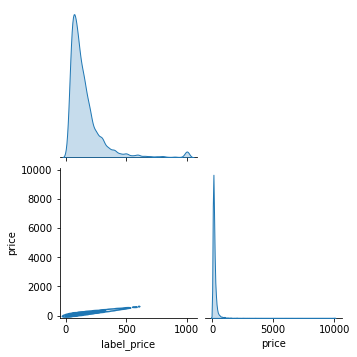

In [96]:
sns.pairplot(df_corrs, kind = 'kde', corner = True)

## Part 5: Analysis

1. Think about the possible interpretation of the plot. Recall that the label is the listing price. <br> How would you explain the relationship between the label and the two features? Is there a slight tilt to the points cluster, as the price goes up?<br>
2. Are the top two correlated features strongly or weakly correlated with the label? Are they features that should be used for our predictive machine learning problem?
3. Inspect your data matrix. It has a few features that contain unstructured text, meaning text data that is neither numerical nor categorical. List some features that contain unstructured text that you think are valuable for our predictive machine learning problem. Are there other remaining features that you think need to be prepared for the modeling phase? Do you have any suggestions on how to prepare these features?

Record your findings in the cell below.

The label of price shows the relationship of the actual price to the current price. It shows that there is a slight tilt to the point cluster and shows that ass the label price increases, the actual price dramatically increases more. I would say the top features are correleated with the label and might be used for the preidictive machine learning but it doesn't show to have a large factor, so there might be other features that might affect the price. Though there is a moderate level of correlation. Whenit comes to unstructured text such as name, bedrooms_names, or any description labels. They might provide more to the price label, maybe using text processing. mybe some other features could be the id_status or ratings which utilizes categorical data that can be passed through one-hot-encoding or transforming into numerical data. Overall, the labels and features are functional and proivide the basic nessessities for solving the machine learning problem